In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

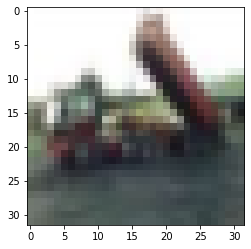

In [6]:
plt.imshow(x_train[2, :, :, :])

In [6]:
images = x_train[1:3, :, :, :]/255.0
images.shape

(2, 32, 32, 3)

In [7]:
filters = np.zeros((5, 5, 3, 2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

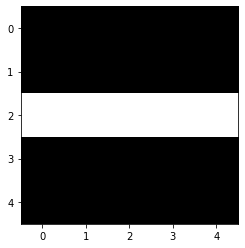

In [8]:
plt.imshow(filters[:, :, :, 1])

In [9]:
convolved_images = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [10]:
convolved_images.shape

TensorShape([2, 32, 32, 2])

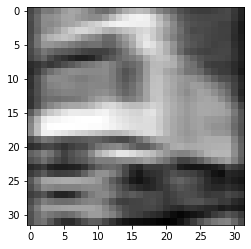

In [11]:
plt.imshow(convolved_images[0, :, :, 1], cmap="gray")

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [13]:
x_train, x_test = x_train/255.0, x_test/255.0

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")                                
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [80]:
model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 193s 120ms/step - loss: 0.3659 - accuracy: 0.8759 - val_loss: 0.2905 - val_accuracy: 0.8958
Epoch 2/20
1594/1594 [==============================] - 190s 119ms/step - loss: 0.3209 - accuracy: 0.8891 - val_loss: 0.2830 - val_accuracy: 0.8989
Epoch 3/20
1594/1594 [==============================] - 191s 120ms/step - loss: 0.2936 - accuracy: 0.8990 - val_loss: 0.2626 - val_accuracy: 0.9048
Epoch 4/20
1594/1594 [==============================] - 190s 119ms/step - loss: 0.2724 - accuracy: 0.9081 - val_loss: 0.2444 - val_accuracy: 0.9116
Epoch 5/20
1594/1594 [==============================] - 192s 120ms/step - loss: 0.2532 - accuracy: 0.9133 - val_loss: 0.2414 - val_accuracy: 0.9148
Epoch 6/20
1594/1594 [==============================] - 191s 120ms/step - loss: 0.2359 - accuracy: 0.9183 - val_loss: 0.2437 - val_accuracy: 0.9149
Epoch 7/20
1594/1594 [==============================] - 189s 118ms/step - loss: 0.2209 - accuracy: 0.9230 - val_

In [46]:
import cv2

In [47]:
ship = cv2.imread("ship.jpg")

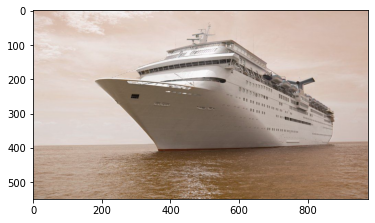

In [48]:
plt.imshow(ship)

In [59]:
ship.shape

(1, 549, 976, 3)

In [60]:
ship = ship.reshape(1, 549, 976, 3)/255.0
ship.shape

(1, 549, 976, 3)

In [61]:
ship_new = tf.image.resize(ship, [299, 299])

In [10]:
xception = keras.applications.Xception()

In [63]:
y_prob = xception.predict(ship_new)

In [64]:
keras.applications.xception.decode_predictions(y_prob, top=5)

[[('n03673027', 'liner', 0.9248845),
  ('n03216828', 'dock', 0.0066769323),
  ('n03344393', 'fireboat', 0.0010699629),
  ('n03095699', 'container_ship', 0.0007993589),
  ('n03947888', 'pirate', 0.00057397323)]]

In [32]:
xception_base = keras.applications.Xception(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(xception_base.output)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model = keras.Model(inputs=xception_base.input, outputs=output)

In [43]:
for layer in xception_base.layers:
  layer.trainable = False

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [40]:
y_train.shape

(1000, 1)

In [47]:
x_train = x_train[:1000, ]/255.0
y_train = y_train[:1000,]

In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_5[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                         

In [48]:
model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
27/27 [==============================] - 8s 208ms/step - loss: 2.2762 - accuracy: 0.1412 - val_loss: 2.2503 - val_accuracy: 0.1933
Epoch 2/20
27/27 [==============================] - 5s 175ms/step - loss: 2.1343 - accuracy: 0.3094 - val_loss: 2.2031 - val_accuracy: 0.2800
Epoch 3/20
27/27 [==============================] - 5s 176ms/step - loss: 2.0554 - accuracy: 0.3847 - val_loss: 2.1727 - val_accuracy: 0.3000
Epoch 4/20
27/27 [==============================] - 5s 185ms/step - loss: 2.0006 - accuracy: 0.4647 - val_loss: 2.1535 - val_accuracy: 0.3067
Epoch 5/20
27/27 [==============================] - 5s 181ms/step - loss: 1.9571 - accuracy: 0.4859 - val_loss: 2.1413 - val_accuracy: 0.2867
Epoch 6/20
27/27 [==============================] - 5s 179ms/step - loss: 1.9221 - accuracy: 0.5047 - val_loss: 2.1303 - val_accuracy: 0.3200
Epoch 7/20
27/27 [==============================] - 5s 172ms/step - loss: 1.8928 - accuracy: 0.5118 - val_loss: 2.1148 - val_accuracy: 0.3333
Epoch 

In [ ]:
xception_base = keras.applications.Xception(include_top=False)
ga_layer = keras.layers.GlobalAveragePooling2D()(xception_base.output)
classification_output = keras.layers.Dense(10, activation="softmax")(ga_layer)
box_output = keras.layers.Dense(4)(ga_layer)
model = keras.Model(inputs=xception_base.input,
                    outputs=[classification_output, box_output])

In [ ]:
model.compile(loss=["sparse_categorical_crossentropy", "mae"])